#  Website Behavior Analysis - A Supervised Learning Case study

### Problem:

The client is an online ecommerce player. They have shared a user level log data for their browsing behavior (Timestamp, UserId and website section visited). You have been provided with the final conversion data too (Timestamp, UserID, Products Purchased in the transaction, Overall Cart Value).

Task: Based on this data you are required to build features and model on these characteristics of users to calculate a score/rank for conversion probability of that user. These scores will eventually decide the bidding logic used for each user. Your model will be evaluated on these criteria: - \ a. Feature Engineering (Variable Imputation) \ b. Model Selection Criteria (Basis of choosing the final Technique) \ c. Measurement Criteria (Comparison of Various Models) \ d. Scope for improvement \

Data

Timestamp - Time duration of customer using the website \ UserID - User if of the customer \ Website_section_visited - Website sections visited by the user \ Products_Purchased - Product purchased by the user \ Cart_Value - cart value of each customers \

Objective:

To build a predictive regression model which predict the probability of a user buying a product, based on the characteristics of user observed from the website browsing history data.

### Solution Approach

  1. Data Gathering
  2. Data Cleaning
  3. Feature Engineering / Feature Construction
  4. Feature selection
  5. Feature scaling
  6. Model Building
  7. Model Performance Evaluation
  8. Model evaluation
  9. Feature scope

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### Reading datasets 

In [2]:
data_behav = pd.read_csv('C:/Users/freya/Documents/Datasets/Problem2_Site_BrowingBehavior.csv',delimiter='\t',names=['Timestamp', 'UserID','Website_section_visited'],header=None)

In [3]:
data_conver = pd.read_csv('C:/Users/freya/Documents/Datasets/Problem2_FInalConversions.csv',delimiter='\t',names=['Timestamp','UserID','Products_Purchased','Cart_Value'],header=None)

#### Analysing Problem2_Site_BrowingBehavior

In [4]:
data_behav.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [5]:
data_behav.shape

(5535924, 3)

#### Checking for Duplicates

In [7]:
duplicate_b = data_behav[data_behav.duplicated()]

In [8]:
duplicate_b

,Timestamp,UserID,Website_section_visited
94,2017-07-26 00:00:11.904,0,home
128,2017-07-26 00:00:17.704,0,product
140,2017-07-26 00:00:19.072,0,content
188,2017-07-26 00:00:26.466,0,content
212,2017-07-26 00:00:29.289,0,product
...,...,...,...
5481641,2017-07-26 23:59:20.549,0,product
5481691,2017-07-26 23:59:28.814,0,home
5481826,2017-07-26 23:59:54.249,0,product-listing-category
5481836,2017-07-26 23:59:55.529,0,product


In [9]:
data_behav.drop_duplicates(inplace=True)

In [10]:
data_behav.shape

(5523793, 3)

#### Analysing Problem2_FInalConversions

In [11]:
data_conver.head()

,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [12]:
data_conver.shape

(79795, 4)

#### Checking for Duplicates and removind Duplicate rows

In [13]:
duplicate = data_conver[data_conver.duplicated()]

In [14]:
duplicate

,Timestamp,UserID,Products_Purchased,Cart_Value
616,2017-07-26 00:41:43.623,552634879691371354,H211370,27.48
1392,2017-07-26 00:38:44.436,4342349809116568139,H211370,27.48
1449,2017-07-26 00:46:27.773,4641517315491359777,H211370,27.48
1557,2017-07-26 00:27:58.295,0,H211394,39.18
2205,2017-07-26 00:17:19.694,130033468135455679,H211370,27.48
...,...,...,...,...
71413,2017-07-26 21:10:12.161,1825140125170822967,A16619,73.00
71415,2017-07-26 21:10:12.174,1825140125170822967,A16619,73.00
74501,2017-07-26 17:25:54.595,7230176287434767648,A271589,30.00
77782,2017-07-26 21:56:26.758,8709668413059765120,A252368,43.32


In [15]:
data_conver.drop_duplicates(inplace=True)

In [16]:
data_conver.shape

(79694, 4)

#### Looking detail information of the data

In [17]:
data_behav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5523793 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 168.6+ MB


In [18]:
data_conver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79694 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           79694 non-null  object 
 1   UserID              79694 non-null  int64  
 2   Products_Purchased  79694 non-null  object 
 3   Cart_Value          79694 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [40]:
## checking for null values
data_conver.isnull().sum()

Timestamp             0
UserID                0
Products_Purchased    0
Cart_Value            0
dtype: int64

In [41]:
## checking for null values
data_behav.isnull().sum()

Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64

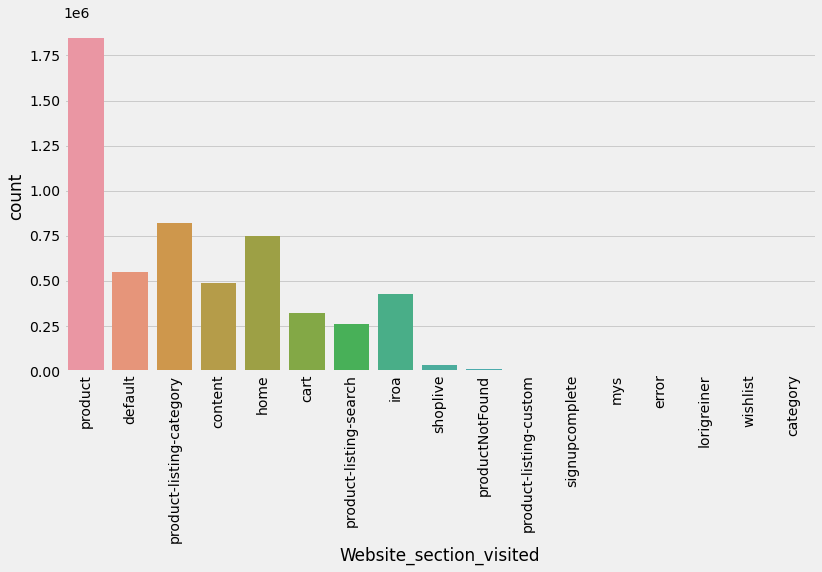

In [20]:
## Plot Website section visited
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(12,6))
sns.countplot(data_behav['Website_section_visited'])
plt.xticks(rotation=90)
plt.show()

In [1]:
## how many times a user visited the site

In [113]:
site_login = data_behav.groupby('UserID')['Website_section_visited'].agg(['count'])
site_login = site_login.reset_index()
site_login.columns = ['UserID','No_of_times_visited']
site_login.drop_duplicates(inplace=True)
site_login

,UserID,No_of_times_visited
0,0,1395827
1,2,15
2,5,2
3,342391,7
4,420372,2
...,...,...
516927,9223331925947099393,1
516928,9223332159306941752,5
516929,9223343967635174542,8
516930,9223348075878229938,5


In [42]:
data_conver['Products_Purchased'].value_counts()

K45766                                     6193
H211394                                    5142
H211370                                    4874
A293532                                    4797
H211397                                    1430
                                           ... 
A294544,A294544                               1
J331462                                       1
H212082,A280394,A280394,H212082,H212082       1
E210792,E231198                               1
A296470,H211800,H210000                       1
Name: Products_Purchased, Length: 13066, dtype: int64

In [43]:
data_conver.loc[(data_conver['Products_Purchased']=='K45766')]

,Timestamp,UserID,Products_Purchased,Cart_Value
337,2017-07-26 00:43:12.600,0,K45766,89.96
412,2017-07-26 00:51:37.235,0,K45766,89.96
1848,2017-07-26 00:44:14.748,0,K45766,89.96
3321,2017-07-26 00:39:13.413,6132869035580859705,K45766,89.96
4623,2017-07-26 01:13:11.574,1174182909896433582,K45766,89.96
...,...,...,...,...
79762,2017-07-26 23:32:34.120,8777902383892038887,K45766,89.96
79765,2017-07-26 23:40:56.841,8819511528220806452,K45766,89.96
79770,2017-07-26 23:05:15.471,8897651711716873273,K45766,89.96
79771,2017-07-26 23:01:03.186,8899229696349448006,K45766,89.96


In [44]:
data_conver.loc[(data_conver['Products_Purchased']=='K45766') & (data_conver['UserID']==0)]

,Timestamp,UserID,Products_Purchased,Cart_Value
337,2017-07-26 00:43:12.600,0,K45766,89.96
412,2017-07-26 00:51:37.235,0,K45766,89.96
1848,2017-07-26 00:44:14.748,0,K45766,89.96
6042,2017-07-26 01:43:33.605,0,K45766,89.96
8637,2017-07-26 02:33:50.783,0,K45766,89.96
...,...,...,...,...
78882,2017-07-26 23:52:10.325,0,K45766,89.96
78891,2017-07-26 23:54:44.370,0,K45766,89.96
78895,2017-07-26 23:55:26.602,0,K45766,89.96
78904,2017-07-26 23:55:49.538,0,K45766,89.96


In [45]:
# Converting to datetime format
data_behav['Timestamp'] = pd.to_datetime(data_behav['Timestamp'])

In [46]:
data_conver['Timestamp'] = pd.to_datetime(data_conver['Timestamp'])

In [47]:
merged_data = pd.merge(data_conver, data_behav,left_index=True,right_index=True)
merged_data.head()

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,UserID_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,0,content


In [48]:
merged_data.shape

(78450, 7)

In [49]:
merged_data.drop(columns=['UserID_y'],inplace=True, axis =1)

In [50]:
merged_data

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content
...,...,...,...,...,...,...
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,2017-07-26 00:39:14.899,home
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,2017-07-26 00:39:14.909,content
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,2017-07-26 00:39:14.944,home
79793,2017-07-26 23:13:02.550,9211905364441411643,A209343,73.00,2017-07-26 00:39:15.161,product


In [81]:
df_final = merged_data.copy()
df_final.head()

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


In [82]:
df_final['Website_section_visited'].value_counts()

product                     26340
product-listing-category    10807
home                         9752
content                      9114
default                      6951
iroa                         5903
cart                         5161
product-listing-search       3587
shoplive                      675
productNotFound                87
product-listing-custom         56
signupcomplete                 17
Name: Website_section_visited, dtype: int64

In [83]:
df_final['Products_Purchased'].value_counts()

K45766                                     6080
H211394                                    5061
H211370                                    4794
A293532                                    4724
H211397                                    1403
                                           ... 
H212082,A280394,A280394,H212082,H212082       1
A279399                                       1
A329851                                       1
K43792                                        1
A296470,H211800,H210000                       1
Name: Products_Purchased, Length: 12928, dtype: int64

In [84]:
## Caluculate time spend by a user in the section
import datetime
from datetime import timedelta

def find_time_spent(df):
    diff = df['Timestamp_x'] - df['Timestamp_y']
    tol_sec = diff.total_seconds()
    return(abs(tol_sec/60))

In [85]:
df_final['Total_minutes_spent'] = df_final.apply(find_time_spent,axis=1)
df_final

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited,Total_minutes_spent
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product,1.508333
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product,3.102450
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default,36.777333
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category,41.048067
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content,45.372667
...,...,...,...,...,...,...,...
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,2017-07-26 00:39:14.899,home,1349.888383
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,2017-07-26 00:39:14.909,content,1385.076600
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,2017-07-26 00:39:14.944,home,1394.011950
79793,2017-07-26 23:13:02.550,9211905364441411643,A209343,73.00,2017-07-26 00:39:15.161,product,1353.789817


In [86]:
df_final.to_excel('WBV-A.xlsx', index=False)

In [87]:
df_final.drop(columns=['Timestamp_x','Timestamp_y'], inplace=True, axis=1)
df_final.head(2)

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450


In [88]:
df_final.UserID_x.value_counts()

0                      19872
6999042003656970156       30
559346213618742389        22
1536590739380574003       20
9050159186422090402       19
                       ...  
2317839966663889987        1
2270881352281344408        1
2267140736353810557        1
2178391343789308397        1
9174973170462435039        1
Name: UserID_x, Length: 40553, dtype: int64

In [77]:
df_final.loc[(df_final['UserID_x'] == 0)]

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450
2,0,H211370,30.48,default,36.777333
3,0,A282331,51.00,product-listing-category,41.048067
4,0,H211410,16.74,content,45.372667
...,...,...,...,...,...
78916,0,E290127,184.96,cart,1400.173167
78917,0,J348160,24.20,home,1400.936683
78918,0,H212471,69.34,product-listing-category,1401.248617
78919,0,"M54058,M54058",119.88,product,1401.421300


In [163]:
## Total money spent by user
total_money_spent = df_final.groupby('UserID_x')['Cart_Value'].agg(['sum'])
total_money_spent=total_money_spent.reset_index()
total_money_spent.columns = ['UserID_x','Total_cart_value']
#df_final.drop_duplicates(inplace=True)
total_money_spent

,UserID_x,Total_cart_value
0,0,1354720.87
1,2941287703,75.34
2,71023925710020,89.96
3,394529638495081,94.34
4,430191686443660,84.70
...,...,...
40548,9222344977727669611,89.96
40549,9222827786235385211,292.00
40550,9222849861047010228,64.40
40551,9223093682582171386,144.96


In [80]:
df_final

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450
2,0,H211370,30.48,default,36.777333
3,0,A282331,51.00,product-listing-category,41.048067
4,0,H211410,16.74,content,45.372667
...,...,...,...,...,...
79790,9174973170462435039,K45766,89.96,home,1349.888383
79791,9179943977593655876,V34738,24.66,content,1385.076600
79792,9179943977593655876,H210000,21.64,home,1394.011950
79793,9211905364441411643,A209343,73.00,product,1353.789817


In [63]:
df_final.loc[(df_final['UserID_x'] == 0) & (df_final['Products_Purchased'] == 'H211801')]

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
5,0,H211801,34.35,home,45.481033
10,0,H211801,34.35,product,47.698717
17,0,H211801,34.35,home,13.646583
27,0,H211801,34.35,cart,4.446517
71,0,H211801,34.35,product,10.154817
392,0,H211801,34.35,product-listing-category,49.208167
519,0,H211801,34.35,iroa,57.866417
1181,0,H211801,34.35,cart,0.092867
1183,0,H211801,34.35,home,0.233667
1184,0,H211801,34.35,product-listing-category,0.442500


In [64]:
df_final.loc[(df_final['UserID_x'] == 0) & (df_final['Products_Purchased'] == 'H211394')]

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent
6,0,H211394,44.68,product-listing-category,46.016217
14,0,H211394,44.68,home,2.252433
29,0,H211394,39.18,cart,5.218800
33,0,H211394,39.18,product,5.521183
47,0,H211394,44.68,product,7.745083
...,...,...,...,...,...
75314,0,H211394,44.68,default,1135.303133
75352,0,H211394,44.68,iroa,1153.877883
75362,0,H211394,44.68,default,1157.280600
76175,0,H211394,44.68,home,1201.824050


In [164]:
final_data = pd.merge(df_final,site_login,left_on='UserID_x',right_on='UserID')

In [165]:
final_data

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID,No_of_times_visited
0,0,A293532,52.14,product,1.508333,0,1395827
1,0,H209597,31.50,product,3.102450,0,1395827
2,0,H211370,30.48,default,36.777333,0,1395827
3,0,A282331,51.00,product-listing-category,41.048067,0,1395827
4,0,H211410,16.74,content,45.372667,0,1395827
...,...,...,...,...,...,...,...
78248,9138678094731427197,A280809,42.72,iroa,1393.450650,9138678094731427197,11
78249,9162285675244079016,A293532,52.14,product,1394.943733,9162285675244079016,5
78250,9162285675244079016,A293532,52.14,content,1396.088033,9162285675244079016,5
78251,9168488389924043940,K45797,35.48,product,1373.752567,9168488389924043940,13


In [166]:
total_products_per_user = df_final.groupby('UserID_x')['Cart_Value'].agg(['count'])
total_products_per_user = total_products_per_user.reset_index()
total_products_per_user.columns=['UserID_x','Total_products_purchased']
total_products_per_user

,UserID_x,Total_products_purchased
0,0,19872
1,2941287703,1
2,71023925710020,1
3,394529638495081,1
4,430191686443660,2
...,...,...
40548,9222344977727669611,1
40549,9222827786235385211,1
40550,9222849861047010228,1
40551,9223093682582171386,1


In [167]:
final_data = pd.merge(final_data,total_products_per_user,on='UserID_x')

In [168]:
final_data

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID,No_of_times_visited,Total_products_purchased
0,0,A293532,52.14,product,1.508333,0,1395827,19872
1,0,H209597,31.50,product,3.102450,0,1395827,19872
2,0,H211370,30.48,default,36.777333,0,1395827,19872
3,0,A282331,51.00,product-listing-category,41.048067,0,1395827,19872
4,0,H211410,16.74,content,45.372667,0,1395827,19872
...,...,...,...,...,...,...,...,...
78248,9138678094731427197,A280809,42.72,iroa,1393.450650,9138678094731427197,11,1
78249,9162285675244079016,A293532,52.14,product,1394.943733,9162285675244079016,5,2
78250,9162285675244079016,A293532,52.14,content,1396.088033,9162285675244079016,5,2
78251,9168488389924043940,K45797,35.48,product,1373.752567,9168488389924043940,13,1


In [169]:
final_data['Buy_Probability'] = (final_data['Total_products_purchased']/final_data['No_of_times_visited'])
final_data

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID,No_of_times_visited,Total_products_purchased,Buy_Probability
0,0,A293532,52.14,product,1.508333,0,1395827,19872,0.014237
1,0,H209597,31.50,product,3.102450,0,1395827,19872,0.014237
2,0,H211370,30.48,default,36.777333,0,1395827,19872,0.014237
3,0,A282331,51.00,product-listing-category,41.048067,0,1395827,19872,0.014237
4,0,H211410,16.74,content,45.372667,0,1395827,19872,0.014237
...,...,...,...,...,...,...,...,...,...
78248,9138678094731427197,A280809,42.72,iroa,1393.450650,9138678094731427197,11,1,0.090909
78249,9162285675244079016,A293532,52.14,product,1394.943733,9162285675244079016,5,2,0.400000
78250,9162285675244079016,A293532,52.14,content,1396.088033,9162285675244079016,5,2,0.400000
78251,9168488389924043940,K45797,35.48,product,1373.752567,9168488389924043940,13,1,0.076923


In [170]:
final_data=pd.merge(final_data,total_money_spent,on='UserID_x')
final_data

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value
0,0,A293532,52.14,product,1.508333,0,1395827,19872,0.014237,1354720.87
1,0,H209597,31.50,product,3.102450,0,1395827,19872,0.014237,1354720.87
2,0,H211370,30.48,default,36.777333,0,1395827,19872,0.014237,1354720.87
3,0,A282331,51.00,product-listing-category,41.048067,0,1395827,19872,0.014237,1354720.87
4,0,H211410,16.74,content,45.372667,0,1395827,19872,0.014237,1354720.87
...,...,...,...,...,...,...,...,...,...,...
78248,9138678094731427197,A280809,42.72,iroa,1393.450650,9138678094731427197,11,1,0.090909,42.72
78249,9162285675244079016,A293532,52.14,product,1394.943733,9162285675244079016,5,2,0.400000,104.28
78250,9162285675244079016,A293532,52.14,content,1396.088033,9162285675244079016,5,2,0.400000,104.28
78251,9168488389924043940,K45797,35.48,product,1373.752567,9168488389924043940,13,1,0.076923,35.48


In [171]:
final_data.drop_duplicates('UserID_x',inplace=True)
final_data

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value
0,0,A293532,52.14,product,1.508333,0,1395827,19872,0.014237,1354720.87
19872,23951842225160889,H211370,33.48,product-listing-search,26.025000,23951842225160889,8,2,0.250000,60.96
19874,30833658052409950,H211394,44.68,content,54.915333,30833658052409950,13,5,0.384615,216.12
19879,33873861847792934,H211800,53.24,product,10.063067,33873861847792934,5,1,0.200000,53.24
19880,42949238806579040,A286591,30.00,default,14.423817,42949238806579040,20,2,0.100000,52.48
...,...,...,...,...,...,...,...,...,...,...
78247,9138020064668426621,A282215,38.68,product-listing-category,1375.294917,9138020064668426621,2,1,0.500000,38.68
78248,9138678094731427197,A280809,42.72,iroa,1393.450650,9138678094731427197,11,1,0.090909,42.72
78249,9162285675244079016,A293532,52.14,product,1394.943733,9162285675244079016,5,2,0.400000,104.28
78251,9168488389924043940,K45797,35.48,product,1373.752567,9168488389924043940,13,1,0.076923,35.48


In [172]:
final_data.drop(final_data.index[0],inplace=True)
final_data

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value
19872,23951842225160889,H211370,33.48,product-listing-search,26.025000,23951842225160889,8,2,0.250000,60.96
19874,30833658052409950,H211394,44.68,content,54.915333,30833658052409950,13,5,0.384615,216.12
19879,33873861847792934,H211800,53.24,product,10.063067,33873861847792934,5,1,0.200000,53.24
19880,42949238806579040,A286591,30.00,default,14.423817,42949238806579040,20,2,0.100000,52.48
19882,53342625381053594,H211399,67.30,product,6.134383,53342625381053594,18,2,0.111111,111.98
...,...,...,...,...,...,...,...,...,...,...
78247,9138020064668426621,A282215,38.68,product-listing-category,1375.294917,9138020064668426621,2,1,0.500000,38.68
78248,9138678094731427197,A280809,42.72,iroa,1393.450650,9138678094731427197,11,1,0.090909,42.72
78249,9162285675244079016,A293532,52.14,product,1394.943733,9162285675244079016,5,2,0.400000,104.28
78251,9168488389924043940,K45797,35.48,product,1373.752567,9168488389924043940,13,1,0.076923,35.48


In [173]:
duplicate_c = final_data[final_data.duplicated()]
duplicate_c

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,UserID,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value


In [174]:
final_data.drop(['UserID','UserID_x'],axis = 1,inplace=True)

In [175]:
final_data

,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value
19872,H211370,33.48,product-listing-search,26.025000,8,2,0.250000,60.96
19874,H211394,44.68,content,54.915333,13,5,0.384615,216.12
19879,H211800,53.24,product,10.063067,5,1,0.200000,53.24
19880,A286591,30.00,default,14.423817,20,2,0.100000,52.48
19882,H211399,67.30,product,6.134383,18,2,0.111111,111.98
...,...,...,...,...,...,...,...,...
78247,A282215,38.68,product-listing-category,1375.294917,2,1,0.500000,38.68
78248,A280809,42.72,iroa,1393.450650,11,1,0.090909,42.72
78249,A293532,52.14,product,1394.943733,5,2,0.400000,104.28
78251,K45797,35.48,product,1373.752567,13,1,0.076923,35.48


In [176]:
final_data['User_rank'] = (final_data['Buy_Probability'] * final_data['Total_cart_value'])
final_data

,Products_Purchased,Cart_Value,Website_section_visited,Total_minutes_spent,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value,User_rank
19872,H211370,33.48,product-listing-search,26.025000,8,2,0.250000,60.96,15.240000
19874,H211394,44.68,content,54.915333,13,5,0.384615,216.12,83.123077
19879,H211800,53.24,product,10.063067,5,1,0.200000,53.24,10.648000
19880,A286591,30.00,default,14.423817,20,2,0.100000,52.48,5.248000
19882,H211399,67.30,product,6.134383,18,2,0.111111,111.98,12.442222
...,...,...,...,...,...,...,...,...,...
78247,A282215,38.68,product-listing-category,1375.294917,2,1,0.500000,38.68,19.340000
78248,A280809,42.72,iroa,1393.450650,11,1,0.090909,42.72,3.883636
78249,A293532,52.14,product,1394.943733,5,2,0.400000,104.28,41.712000
78251,K45797,35.48,product,1373.752567,13,1,0.076923,35.48,2.729231


In [177]:
final_data.corr()

,Cart_Value,Total_minutes_spent,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value,User_rank
Cart_Value,1.000000,0.077458,0.003406,-0.037162,-0.023362,0.826104,0.518764
Total_minutes_spent,0.077458,1.000000,-0.120196,-0.189176,0.039782,0.010540,0.023578
No_of_times_visited,0.003406,-0.120196,1.000000,0.376754,-0.394605,0.143490,-0.105319
Total_products_purchased,-0.037162,-0.189176,0.376754,1.000000,0.047306,0.313034,0.246888
Buy_Probability,-0.023362,0.039782,-0.394605,0.047306,1.000000,-0.001407,0.437729
Total_cart_value,0.826104,0.010540,0.143490,0.313034,-0.001407,1.000000,0.651849
User_rank,0.518764,0.023578,-0.105319,0.246888,0.437729,0.651849,1.000000


<AxesSubplot:>

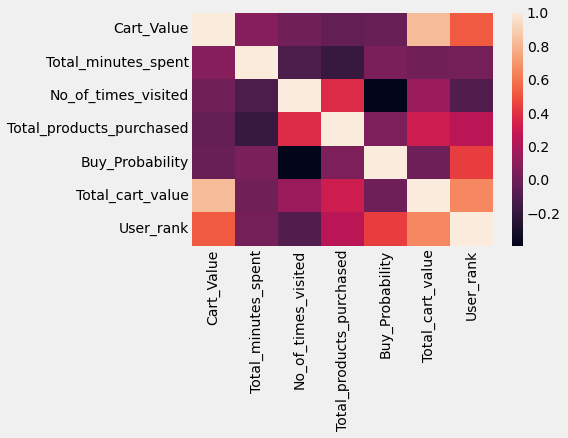

In [178]:
sns.heatmap(final_data.corr())

In [180]:
final_data.drop(['Website_section_visited','Cart_Value','Products_Purchased'],axis = 1,inplace=True)
final_data

,Total_minutes_spent,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value,User_rank
19872,26.025000,8,2,0.250000,60.96,15.240000
19874,54.915333,13,5,0.384615,216.12,83.123077
19879,10.063067,5,1,0.200000,53.24,10.648000
19880,14.423817,20,2,0.100000,52.48,5.248000
19882,6.134383,18,2,0.111111,111.98,12.442222
...,...,...,...,...,...,...
78247,1375.294917,2,1,0.500000,38.68,19.340000
78248,1393.450650,11,1,0.090909,42.72,3.883636
78249,1394.943733,5,2,0.400000,104.28,41.712000
78251,1373.752567,13,1,0.076923,35.48,2.729231


In [181]:
final_data.to_csv('Website_Behaviour_Analysis.csv',index=False)

In [182]:
df = pd.read_csv('Website_Behaviour_Analysis.csv')

In [183]:
df

,Total_minutes_spent,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value,User_rank
0,26.025000,8,2,0.250000,60.96,15.240000
1,54.915333,13,5,0.384615,216.12,83.123077
2,10.063067,5,1,0.200000,53.24,10.648000
3,14.423817,20,2,0.100000,52.48,5.248000
4,6.134383,18,2,0.111111,111.98,12.442222
...,...,...,...,...,...,...
40393,1375.294917,2,1,0.500000,38.68,19.340000
40394,1393.450650,11,1,0.090909,42.72,3.883636
40395,1394.943733,5,2,0.400000,104.28,41.712000
40396,1373.752567,13,1,0.076923,35.48,2.729231


In [184]:
!pip install pandas-profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.0.1 which is incompatible.



  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=847974b7102970e600694713101043c51393bc447bb2a557592b06dcb63f52e4
  Stored in directory: c:\users\freya\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=25c53a91694fa11b7f5fcab060b54a0edf736c3fad2c4e5ae06b6ed8c056c58b
  Stored in directory: c:\users\freya\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [185]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Website_Behaviour_Analysis')
profile.to_file(output_file = "WBA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]